# **Projekt na zajęcia Głębokie Sieci Neuronowe, prowadzący dr. hab inż Andrzej Rusiecki**
# **Twórcy: Adam Kubiak i Wiktor Bajor**
# **Projekt: Implementacja sieci neuronowej w celu klasyfikacji prostych szkiców**

W ramach projektu została wykonana implementacja wielowarstwowej sieci neuronowej od podstaw z wykorzystaniem biblioteki `Numpy`. Zadaniem wykonanej sieci neuronowej będzie klasyfikacja prymitywnych szkiców najróżniejszych obiektów, narysowanych w prostej aplikacji okienkowej, wykonanej przy pomocy biblioteki `PyGame`. Jako zestaw danych, który zostanie wykorzystany do uczenia sieci neuronowej w projekcie posłużą nam rysunki z bazy danych projektu open-source pod nazwą `”Quick, Draw!”`. Projekt spełnia następujące zadania:

- Przygotowanie zbioru danych uczących i testowych
- Przetworzenie zbioru danych 
- Implementacja rozszerzalnej sieci neuronowej z możliwością zmiany jej parametrów
- Sprawdzenie dokładności modelu z wykorzystaniem zbioru testowego danych i analiza wyników
- Wytrenowanie sieci neurowonej z wykorzystaniem różnych parametrów wejściowych oraz poddanie wyników analizie w celu znalezienia najlepszego rozwiązania dla danych
- Wykorzystanie biblioteki `PyGame` w celu umożliwienia użytkownikowi rysowania własnych szkiców, które zostaną poddane klasyfikacji przez wytrenowaną sieć neuronową
- Wykorzystanie wytrenowanego modelu w celu klasyfikacji narysowanych przez użytkownika szkiców i prezentacja wyników po każdej zmianie pixeli na udostępnionym płótnie

# **Ładowanie i wstępne przetwarzanie zbioru danych**
Dane udostępnione przez projekt `”Quick, Draw!”` są w formie plików `NPY`. Pliki `NPY` są plikami zawierającymi tablice `NumPy` i są one tworzone przez pakiet oprogramowania Python z zainstalowaną biblioteką NumPy. Pliki `NPY` przechowują wszystkie informacje wymagane do zrekonstruowania tablicy na dowolnym komputerze, w tym informacje o typie i kształcie. Dzięki formie w której zostały udostępnione dane nie wymagały one intesywnego przetwarzania, wystarczyło wykorzystać kilka podstawowych instrukcji z pakietu `NumPy`. Format zestawu danych jest wzorowany, aby ściśle odpowiadał klasycznemu MNIST. Każdy przypadek treningowy i testowy reprezentuje etykietę (0-20). Dane treningowe (400 000 przypadków) i dane testowe (20 000 przypadków) są utworzone w pliku `DataGather.py` i można je w bardzo prosty sposób rozszerzyć w celu zwiększenia ilości klas bądź też liczby przypadkó dla danych treningowych i testowych. Wiersz danych w pliku `.npy` zawiera 784 wartości, które w całości reprezentują pojedynczy obraz 28x28 pikseli z wartości w skali szarości z zakresu 0-255. Zakres ten został znormalizowany i po przetworzeniu składa się z wartości z przedziału  
-1~1.
Tak jak zostało wcześniej wspomniane wszystkie te operację zostały umieszczone w oddzielnym skrypcie, który zapisuje przetworzone tablice oraz etykiety w oddzielnych plikach.
- X_train - zbiór danych wykorzystany do uczenia sieci neuronowej
- y_train - zbiór etykiet wykorzystany do uczenia sieci neuronowej
- X_valid - zbiór danych testowych wykorzystany do walidacji wyników uczenia
- y_valid - zbiór etykiet testowych wykorzystany do walidacji wyników uczenia

In [23]:
import DataGather as DG
import seaborn as sns
import one_hot
import NeuralNetwork as nn
import matplotlib.pyplot as plt
import numpy as np
DG.DataGather()

In [24]:
X_train = np.load('Dane\\X_train.npy')
y_train = np.load('Dane\\y_train.npy')
X_valid = np.load('Dane\\X_valid.npy')
y_valid = np.load('Dane\\y_valid.npy')

**Konwersja etykiet z liczb całkowitych do postaci "gorącojedynkowej"**

Tablica etykiet składa się z pojedynczych wartości od 0 do 20 dla każdego pojedynczego obrazu. Warstwa wyjściowa sieci neuronowej będzie składać się z 20 węzłów, ponieważ jako klasyfikator z wieloma etykietami ma 20 różnych etykiet. Stąd każda liczba całkowita jest zakodowana w tablicy binarnej o rozmiarze 20x1, przy czym odpowiadająca jej etykieta wynosi 1, a wszystkie inne etykiety są równe 0. Na przykład, jeśli y=4, tablica to [0 0 0 1 0 0.....0].
Do przeprowadzenia tej konswersji został przygotowany krótki skrypt `one_hot.py` w którym znajduję się funkcja `_onehot`, która jako argumenty przyjmuje wcześniej przygotowany zbiór etykiet oraz liczbę pojedyńczych klas.

In [25]:
preview = np.unique(one_hot._onehot(y_train,20),axis = 0)
print(np.flip(preview,axis = 0))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

# **Przegląd danych wykorzystanych do nauki i testowania modelu Wielowarstwowych Sieci Neuronowych**

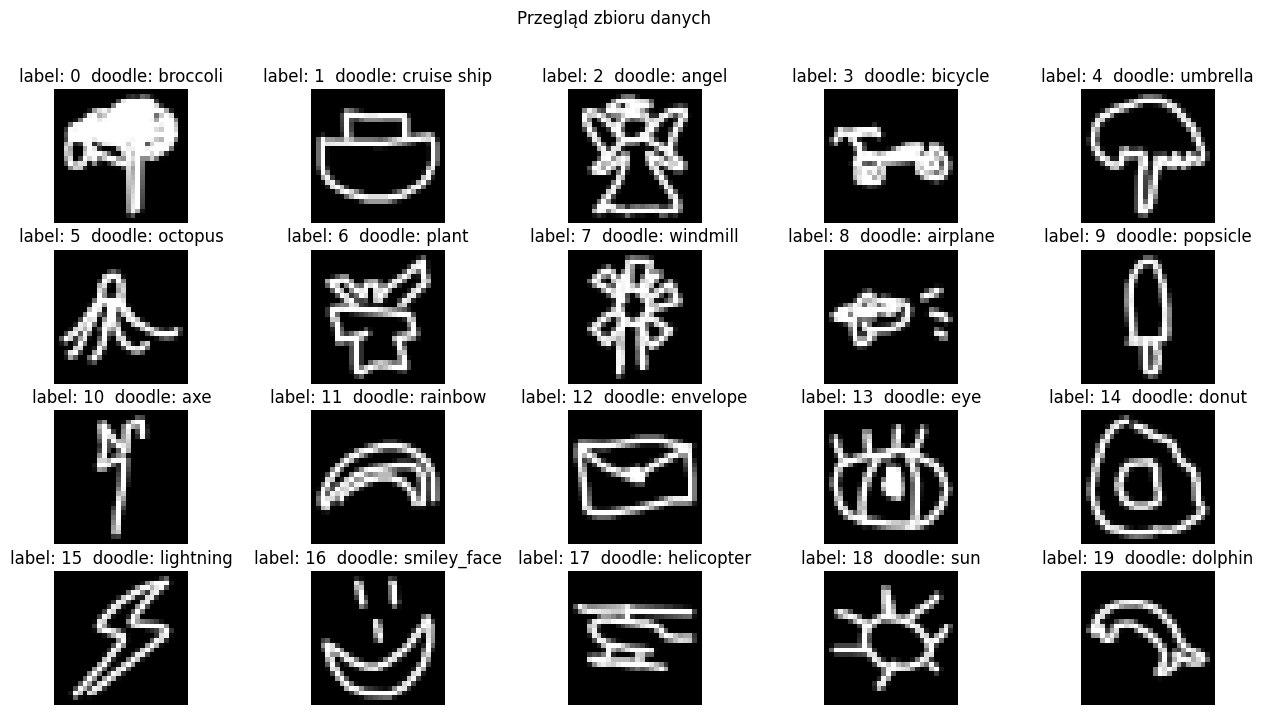

In [26]:

fig,axe=plt.subplots(4,5,figsize = (16,8))
ans = ["broccoli","cruise ship","angel","bicycle","umbrella","octopus","plant","windmill","airplane",
        "popsicle","axe","rainbow","envelope","eye","donut","lightning","smiley_face","helicopter","sun","dolphin"]
fig.suptitle('Przegląd zbioru danych')
idx1 = 0
idx2 = 1
for i in range(4):
    for y in range(5):
        axe[i,y].imshow(X_train[idx2].reshape(28,28),cmap='gray')
        axe[i,y].set_title('label: %i  doodle: %s' %(idx1,ans[idx1]))
        axe[i,y].axis('off')
        idx2+=20000
        idx1+=1

Text(0.5, 1.0, 'Częstotliwość występowania każdej z etykiet')

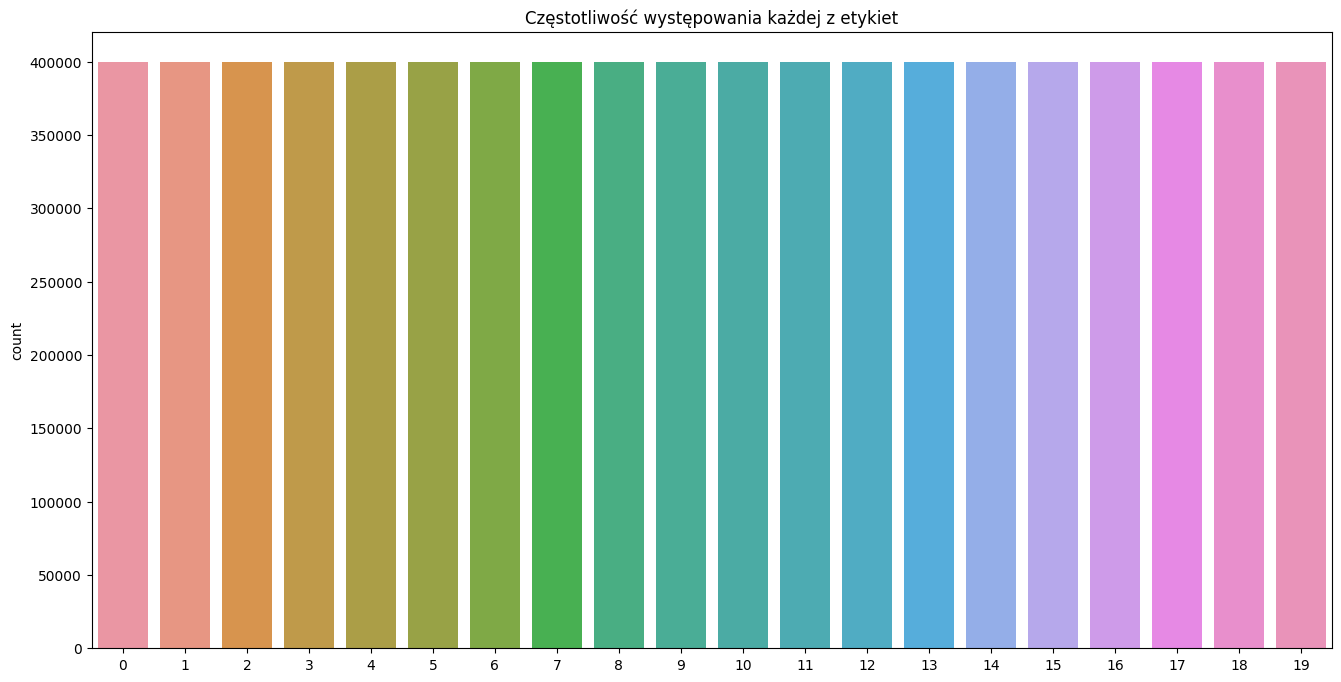

In [27]:
plt.figure(figsize = (16,8))
sns.countplot(one_hot._onehot(y_train,20))
plt.title("Częstotliwość występowania każdej z etykiet")

# **Budowa zaimplementowanej wielowarstwowej sieci neuronowej**
Główne ciało implementacji sieci neuronowej znajduję się w skryptach `Layer.py` i `NeuralNetwork.py` dodatkowo w skrypcie `ActivationFunctions.py` można znaleźć implementację różnych funkcji aktywacji wykorzystywanych w procesie uczenia. Każdy z plików został dokładnie udokumentowany.

**Omówienie konstruktora sieci neuronowej**
Argumenty konstrukora klasy NeuralNetwork:
- layerSizes
- epoch
- eta
- minibatch_size
- HiddenLayerActivationFunction
- OutputLayerActivationFunction

1. Poprzez layerSizes rozumiemy listę zawierającą wymiary każdej z warstw, które wchodzą w skład wielowarstwowej sieci neuronowej. W przypadku gdy użytkownik chciałby utworzyć sieć przestawioną na rysunku poniżej, jako argument należałoby podać następującą listę `[5,12,10,3]`. W przypadku danych wykorzystywanych w tym projekcie istnieją dwa ograniczenia co do wymiarów warstwy wejściowej i wyjściowej. Jest to spowodowane specyfiką danych wejściowych, które są obrazami przedstawionymi jako 784 pikseli oraz ilością etykiet zawartych w zbiorze danych. Wymiary oraz ilość warstw ukrytych jest dowolna i jest obiektem badawczym. 

2. Argument epoch jest liczbą przebiegów po zestawie danych uczących w celu wytrenowania sieci neuronowej

3. Argument eta jest wartością współczynnika uczenia sieci neuronowej. Wybór dobrego współczynnika uczenia pozwola uniknąć zbyt wolnego zmniejszenia wartości otrzymanej z funkcji kosztu oraz uniknięcie przeskakiwania nad minimum globalnym.

4. Wartość argumentu minibatch_size odpowiada za rozmiar tak zwanych minipaczek dzięki którym stosujemy metody gradientowe do mniejszych podzbiorów danych uczących. Zalętą takiego uczenia jest znacznie częstsze aktualizowanie wag. 

5. HiddenLayerActivationFunction przyjmuje wartość typu `string`, dzięki temu argumentowi możemy wybrać która z dostępnych funkcji aktywacji zostaje wykorzystana do obliczenia wartości aktywacji węzłów ukrytych warstw sieci neuronowej.

6. OutputLayerActivationFunction przyjmuje wartość typu `string`, dzięki temu argumentowi możemy wybrać która z dostępnych funkcji aktywacji zostaje wykorzystana do obliczenia wartości aktywacji węzłów wyjściowej warstwy sieci neuronowej.




# ![title](Image\Siec_image.png)

# **Dostępne funkcje aktywacji i ich zastosowanie**

Funkcje aktywacji są krytyczną częścią projektowania sieci neuronowej.

Wybór funkcji aktywacji w warstwie ukrytej będzie kontrolował, jak dobrze model sieci uczy się zbioru danych treningowych. Wybór funkcji aktywacji w warstwie wyjściowej określi rodzaj predykcji, jakie może wykonać model. Funkcja aktywacji w sieci neuronowej określa, w jaki sposób ważona suma danych wejściowych jest przekształcana w dane wyjściowe z węzła lub węzłów w warstwie sieci. Wszystkie ukryte warstwy zwykle używają tej samej funkcji aktywacji. Warstwa wyjściowa będzie zazwyczaj wykorzystywać inną funkcję aktywacji niż warstwy ukryte i zależy od rodzaju przewidywania wymaganego przez model. Funkcje aktywacji są również zwykle różniczkowalne, co oznacza, że ​​pochodną pierwszego rzędu można obliczyć dla danej wartości wejściowej. Jest to wymagane, biorąc pod uwagę, że sieci neuronowe są zwykle uczone przy użyciu algorytmu wstecznej propagacji błędów, który wymaga pochodnej błędu przewidywania w celu aktualizacji wag modelu, takie same wymagania posiada nasza implementacja sieci neuronowej.

**Aktywacja dla wartstw ukrytych**

Warstwa ukryta w sieci neuronowej to warstwa, która otrzymuje dane wejściowe z innej warstwy (takiej jak inna warstwa ukryta lub warstwa wejściowa) i dostarcza dane wyjściowe do innej warstwy (takiej jak inna warstwa ukryta lub warstwa wyjściowa).

Zwykle w ukrytych warstwach sieci neuronowej stosowana jest różniczkowalna nieliniowa funkcja aktywacji. Pozwala to modelowi uczyć się bardziej złożonych funkcji niż sieć trenowana przy użyciu liniowej funkcji aktywacji.

W projekcie będziemy badać działanie trzech różnych funkcji aktywacji dla wartw ukrytych:


**`ReLU`**

Podczas korzystania z funkcji ReLU dla warstw ukrytych, dobrą praktyką jest użycie inicjalizacji wag i normalizacja danych wejściowych wagi do zakresu 0-1 przed treningiem.

**`Sigmoid`**

Podczas korzystania z funkcji Sigmoid dla warstw ukrytych, dobrą praktyką jest użycie inicjalizacji wag i normalizacja danych wejściowych wagi do zakresu 0-1 przed treningiem.

**`Tanh`**

Podczas korzystania z funkcji TanH dla warstw ukrytych, dobrą praktyką jest użycie inicjalizacji wag i normalizacja danych wejściowych wagi do zakresu -1~1 przed treningiem.

Text(0.5, 1.0, 'TanH')

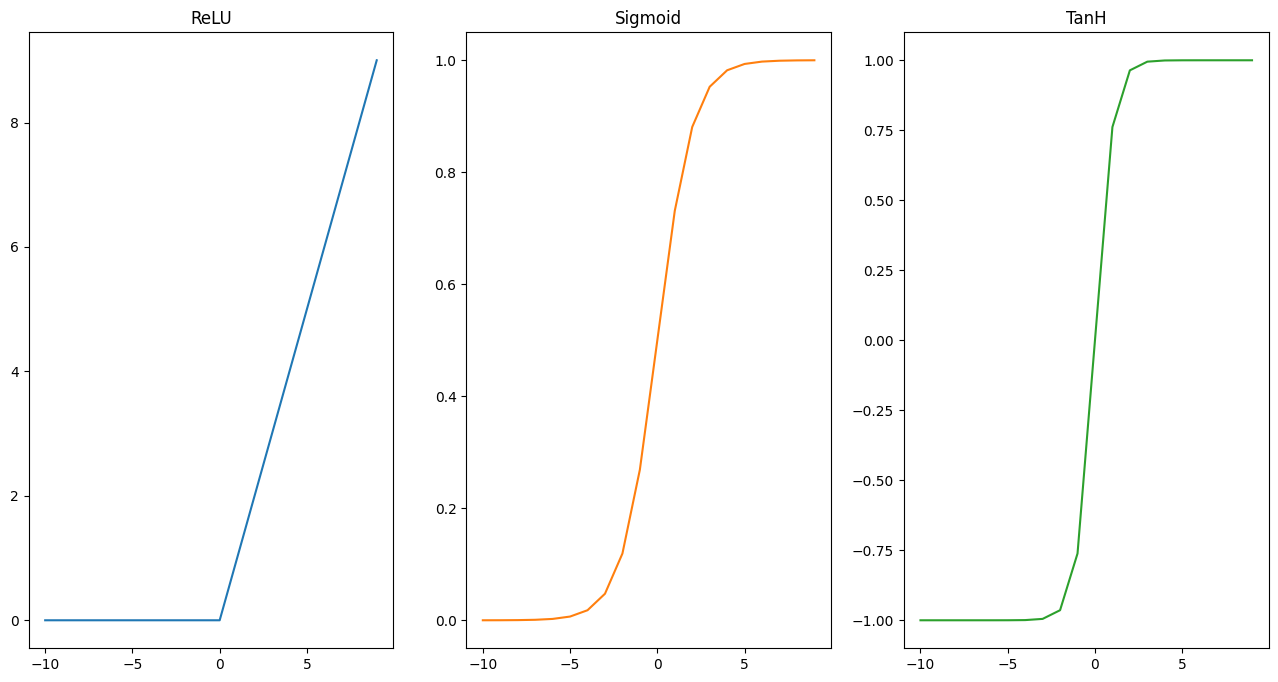

In [28]:
fig, axs = plt.subplots(1, 3,figsize = (16,8))
def rectified(x):
	return max(0.0, x)
inputs = [x for x in range(-10, 10)]
outputs = [rectified(x) for x in inputs]

axs[0].plot(inputs, outputs)
axs[0].set_title('ReLU')
def sigmoid(x):
	return 1.0 / (1.0 + np.exp(-x))
inputs = [x for x in range(-10, 10)]
outputs = [sigmoid(x) for x in inputs]

axs[1].plot(inputs, outputs, 'tab:orange')
axs[1].set_title('Sigmoid')
def tanh(x):
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

inputs = [x for x in range(-10, 10)]
outputs = [tanh(x) for x in inputs]
axs[2].plot(inputs, outputs, 'tab:green')
axs[2].set_title('TanH')

**Aktywacja dla warstw wyjściowych**

Warstwa wyjściowa to warstwa w modelu sieci neuronowej, która bezpośrednio generuje prognozę. W projekcie zostanie wykorzystana funkcja aktywacji Sigmoid oraz Softmax.Funkcja Sigmoid dla każdej klasy otrzymuje wartość w przedziale od 0 do 1, natomiast w funkcji Softmax wartości węzłów przyjmują formę prawdopodobieństwa i sumują się do 1, co jest pomocne w celu przedstawienia jaki jest procent pewności predykcji.

**`Softmax`**

Etykiety docelowe używane do trenowania modelu z funkcją aktywacji sigmoidalnej w warstwie wyjściowej będą miały wartości 0 lub 1. I suma wszystkich predykcji wynosi 1. Jest to najpopularniejsza funkcja aktywacji w kategorii klasyfikacji z wieloma etykietami.

In [60]:
layers = [784,300,159,100,40,20]
network = nn.NeuralNetwork(layers,80,0.0008,0.01,100,'ReLU','Softmax')
#layers = [784,300,60,50,40,20]
#network = nn.NeuralNetwork(layers,10,0.05,0.01,32,'Sigmoid','Softmax')

# **Trenowanie modelu**

**Funkcja kosztu**

Jednym z najbardziej istotnych zadań w algorytmach uczenia sieci neuronowej jest zdefiniowana `funkcja celu`, która będzie optymalizowana w procesie nauki. Funkcja celu często przyjmuje postać funkcji kosztu, którą pragniemy zminimalizować. W przypadku tego projektu zdecydowaliśmy się wykorzystać sumę kwadratów błędów pomiędzy wyliczonym wynikiem a rzeczywistą etykietą klas.  

**Propagacja w przód**

Propagacją w przód określa się proces przebiegu informacji od warstwy wejściowej do warstwy wyjściowej. Gdzie wartość wyjściowa jest naszą predykcją. 

# ![title](Image\forward_prop.png)


**Propagacja wsteczna**

W swojej istocie algorytm propagacji wstecznej stanowi bardzo skuteczny obliczeniowo sposób wyliczania pochodnych złożonej funkcji kosztu w wielowarstwowych sieciach neuronowych. Celem jest wykorzystanie tych pochodnych do aktualizowania współczynników wag stanowiących parametry sieci neuronowej. 

W algorytmie istotnym elementem jest wykorzystanie reguły łańcuchowej, która pozwala na różniczkowanie złożonej, zagnieżdżonej funkcji.

Wektor wyliczonych pochodnych wszystkich parametrów jest nazywany gradientem.

Na rysunku możemy zaobserwować działanie algorytmu wstecznej propagacji dla bardzo uproszczonego przykładu w którym 2 warstwowa sieć posiada po jednym węźle. Można zauważyć że kluczowym elementem algorytmu jest wiedza na temat zróżniczkowanej postaci funkcji kosztu oraz funkcji aktywacji.
# ![title](Image\backwardprop.png)

In [61]:
network.learn(X_train,y_train,X_valid,y_valid)

80/80 | Koszt: 0.22 | Dokładność uczenia/walidacji: 67.73%/67.94% 

**Zapisanie wytrenowanego modelu**

In [62]:
import joblib
joblib.dump(network, 'RSmodel.joblib')

['RSmodel.joblib']

**Wczytanie zapisanego modelu**

In [14]:
import NeuralNetwork as nn
import matplotlib.pyplot as plt
import numpy as np
import joblib

network = joblib.load('model.joblib')

[Text(0, 0.5, 'Koszt'),
 Text(0, 0.5, 'Koszt'),
 Text(0, 0.5, 'Koszt'),
 Text(0, 0.5, 'Koszt')]

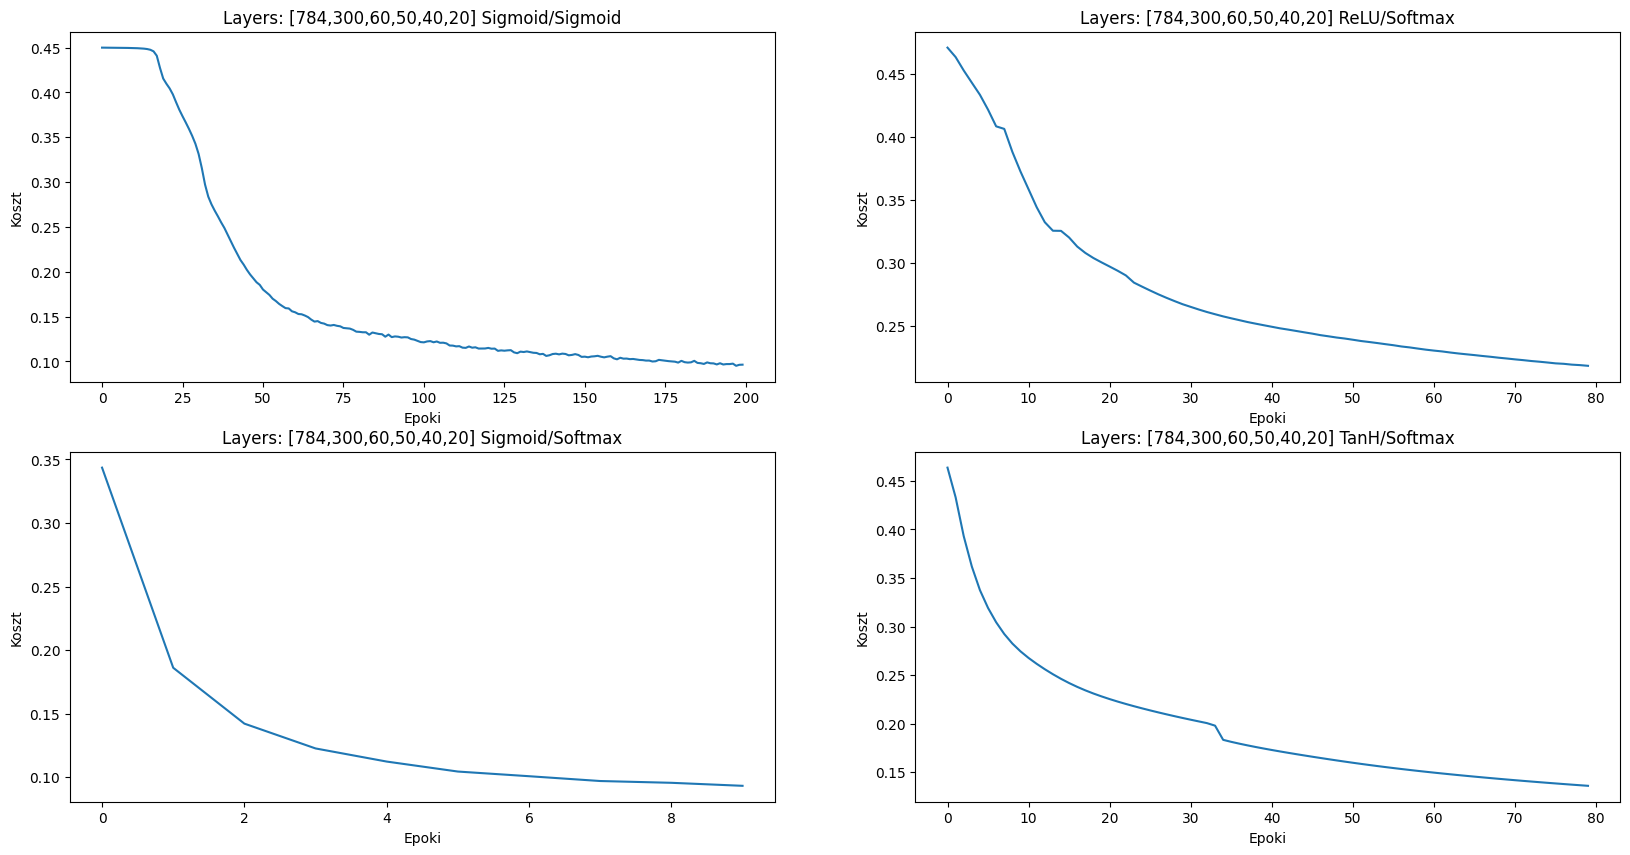

In [65]:
fig, axs = plt.subplots(2, 2,figsize = (20,10))
network = joblib.load('model.joblib')
axs[0][0].plot(range(network.epoch), network.eval_['cost'])
axs[0][0].set_title('Layers: [784,300,60,50,40,20] Sigmoid/Sigmoid')
network = joblib.load('SSmodel.joblib')
axs[1][0].plot(range(network.epoch), network.eval_['cost'])
axs[1][0].set_title('Layers: [784,300,60,50,40,20] Sigmoid/Softmax')
network = joblib.load('RSmodel.joblib')
axs[0][1].plot(range(network.epoch), network.eval_['cost'])
axs[0][1].set_title('Layers: [784,300,60,50,40,20] ReLU/Softmax')
network = joblib.load('TSmodel.joblib')
axs[1][1].plot(range(network.epoch), network.eval_['cost'])
axs[1][1].set_title('Layers: [784,300,60,50,40,20] TanH/Softmax')


plt.setp(axs[:], xlabel='Epoki')
plt.setp(axs[:], ylabel='Koszt')

[Text(0, 0.5, 'Dokładność'),
 Text(0, 0.5, 'Dokładność'),
 Text(0, 0.5, 'Dokładność'),
 Text(0, 0.5, 'Dokładność')]

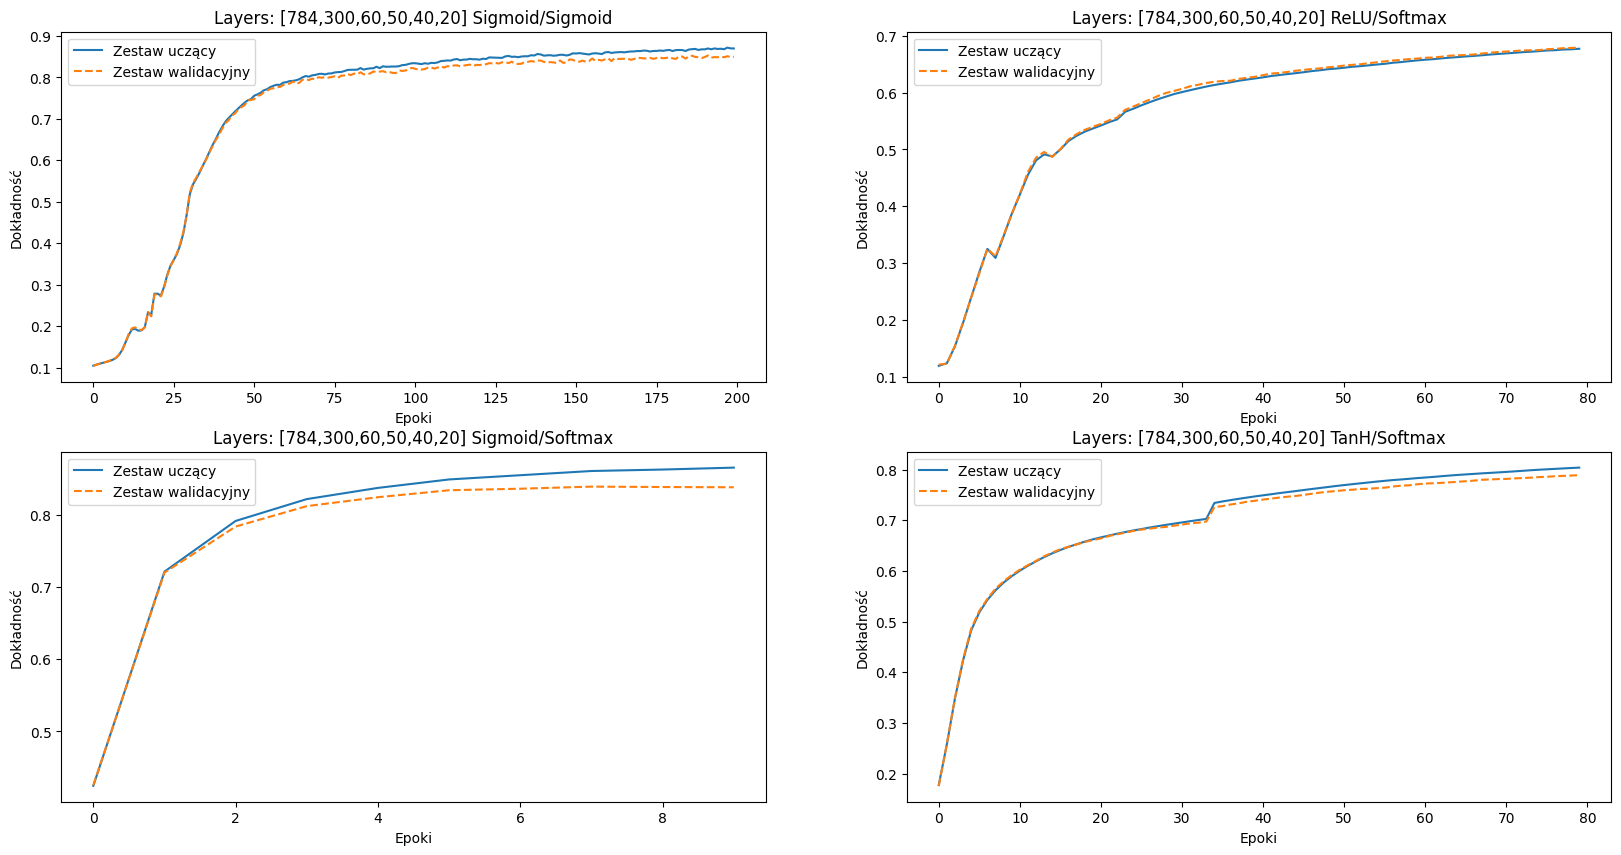

In [70]:
fig, axs = plt.subplots(2, 2,figsize = (20,10))
network = joblib.load('model.joblib')
axs[0][0].plot(range(network.epoch), network.eval_['train_acc'],  label='Zestaw uczący')
axs[0][0].plot(range(network.epoch), network.eval_['valid_acc'],  label='Zestaw walidacyjny', linestyle='--')
axs[0][0].set_title('Layers: [784,300,60,50,40,20] Sigmoid/Sigmoid')
axs[0][0].legend(loc='upper left')
network = joblib.load('SSmodel.joblib')
axs[1][0].plot(range(network.epoch), network.eval_['train_acc'],  label='Zestaw uczący')
axs[1][0].plot(range(network.epoch), network.eval_['valid_acc'],  label='Zestaw walidacyjny', linestyle='--')
axs[1][0].set_title('Layers: [784,300,60,50,40,20] Sigmoid/Softmax')
axs[1][0].legend(loc='upper left')
network = joblib.load('RSmodel.joblib')
axs[0][1].plot(range(network.epoch), network.eval_['train_acc'],  label='Zestaw uczący')
axs[0][1].plot(range(network.epoch), network.eval_['valid_acc'],  label='Zestaw walidacyjny', linestyle='--')
axs[0][1].set_title('Layers: [784,300,60,50,40,20] ReLU/Softmax')
axs[0][1].legend(loc='upper left')
network = joblib.load('TSmodel.joblib')
axs[1][1].plot(range(network.epoch), network.eval_['train_acc'],  label='Zestaw uczący')
axs[1][1].plot(range(network.epoch), network.eval_['valid_acc'],  label='Zestaw walidacyjny', linestyle='--')
axs[1][1].set_title('Layers: [784,300,60,50,40,20] TanH/Softmax')
axs[1][1].legend(loc='upper left')
plt.setp(axs[:], xlabel='Epoki')
plt.setp(axs[:], ylabel='Dokładność')

In [ ]:
y_test_pred = network.network_predict(X_valid)
acc = (np.sum(y_valid == y_test_pred)
       .astype(np.float) / X_valid.shape[0])

print('Dokładność dla danych testowych: %.2f%%' % (acc * 100.))

# **Wnioski**

Przygotowana implementacja pozwala na szereg modyfikacji parametrów sieci przed rozpoczęciem procesu uczenia. Możliwość zmiany parametrów takich jak ilość oraz rozmiar warstw ukrytych, współczynnik uczenia, rozmiar mini-batch i funkcji aktywacji dla warstw ukrytych oraz warstwy wyjściowej daje możliwość eksperymentowania i znalezienia optymalnego rozwiązania dla zadanego problemu.

Użycie modelu sieci na którą składała się jedna warstwa, nie dawało zadowalających rezultatów, ponieważ dokładność predykcji szczytowała przy wartości około 60-70 procent. Z kosztem dłuższego czasu uczenia sieci wykorzystanie większej ilości warstw pozwoliło na osiągnięcie wartości dochodzącej w przedział 80-90 procent. Co podczas testów wykonanych na aplikacji do rysowania okazało się wystarczającym wynikiem aby osiągnąć zadowalające rezulataty predykcji szkiców.

Ważnym elementem przy doborze parametrów sieci jest dobór odpowiedniego współczynika uczenia. Przy doborze zbyt dużej wartości zamiast minimalizacji funkcji kosztu następowało powiększenie błędu wraz z każdą epoką, bądź też wartość błędu oscylowała przy czym nie dążyła do minimalnizacji błędu. Zjawisko to jest spowodowane "przeskakiwaniem nad" minimum globalnym. Z drugiej strony dobór zbyt małego współczynnika uczenia powoduje że minimalizacja wartości jest tak mała, że algorytm musiałby wykonać mnóstwo przebiegów, żeby uzyskać zbieżność z globalnym minimum kosztu. Przy doborze parametru obserwowaliśmy zachowanie algorytmu oraz poprawę wyników z każdą epoką i stroiliśmy jego wartość w celu otrzymania optymalnych wyników uczenia.

Zaletą uczenie za pomocą minipaczek jest szybsza konwergencja, poniważ częściej aktualizujemy wagi, do tego usprawniamy w ten sposób skuteczność obliczeniową algorytmu uczenia. Podczas testów stosowaliśmy wielkość paczek z zakresu 32-100. Większe wartości spowalniały proces uczenia przez co nie braliśmy ich nawet pod uwagę podczas wykonywania testów.

Obserwując wykresy otrzymane przy zastosowaniu różnych kombinacji funkcji aktywacji, można zauważyć, że dla kombinacji Sigmoid/Sigmoid i Sigmoid/Softmax otrzymano bardzo zbliżone do siebie wartości błedu/dokładności. Różnica leży w ilości przebiegów potrzebnych do otrzymania podobnego wyniku dla tych kombinacji. Kombinacja Sigmoid/Sigmoid potrzebowała aż 200 epok aby otrzymać ten sam wynik co kombinacja Sigmoid/Softmax osiągneła przy 10 przebiegach. Przy wykorzystaniu funkcji aktywacji ReLU oraz TanH w warstwach ukrytych dokładność szczytowała przy wartościach z przedziału 60-80%, i nie udało się uzyskać lepszych wyników. Dzięki obserwacją wykresów jesteśmy w stanie potwierdzić, że kombinacja Sigmoid/Softmax najlepiej spisała się w klasyfikacji szkiców ponieważ w krótkim czasie uzyskała bardzo dobry wynik bez występowania overfitingu.





In [5]:
import tkinter as tk
from PIL import ImageTk, Image
import PIL.Image
import io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.cm as cm
from PIL import ImageGrab
import imageio
import sys
class ExampleApp(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.resizable(0,0)
        self.previous_x = self.previous_y = 0
        self.x = self.y = 0
        self.canvas = tk.Canvas(self, width=600, height=600, bg = "black", cursor="cross")
        self.canvas.pack(side="top", fill="both", expand=True)
        self.button_predict = tk.Button(self, text = "Predict image", command = self.pred_doodle)
        self.button_predict.pack(side="top", fill="both", expand=True)
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        self.button_clear.pack(side="top", fill="both", expand=True)
        self.canvas.bind("<Motion>", self.tell_me_where_you_are)
        self.canvas.bind("<B1-Motion>", self.draw_from_where_you_are)
        self.ans = ["broccoli","cruise ship","angel","bicycle","umbrella","octopus","plant","windmill","airplane","popsicle"]
    def clear_all(self):
        self.canvas.delete("all")

    def print_points(self):
        a = 0

    def tell_me_where_you_are(self, event):
        self.previous_x = event.x
        self.previous_y = event.y

    def draw_from_where_you_are(self, event):
        self.x = event.x
        self.y = event.y
        self.canvas.create_line(self.previous_x, self.previous_y, 
                                self.x, self.y,fill="white",width= 20,capstyle="round")  
        r = 40
        #self.canvas.create_oval(self.x - r, self.y - r, self.x + r, self.y + r, fill='white')     
        self.previous_x = self.x
        self.previous_y = self.y
        
        

    def pred_doodle(self):
        #ps = self.canvas.postscript(colormode='color')
        ImageGrab.grab(bbox=(
        self.canvas.winfo_rootx()+3,
        self.canvas.winfo_rooty()+3,
        self.canvas.winfo_rootx() + 600,
        self.canvas.winfo_rooty() + 600
    )).save("fileName" + '.png', 'png')
        #im1 = imageio.imread('fileName.png')
        im1 = PIL.Image.open("fileName.png")
        img = im1.resize((28, 28))
        # convert rgb to grayscale
        img_grey = img.convert('L')
        img_array = np.array(img_grey)
        #img_array = np.array(img)
        
        

        img_array = img_array / 255.0
        #plt.imshow(img_array, cmap=cm.Greys_r)
        #plt.show() 
        img_array = img_array.reshape(1,784)

        
        
        res = network.network_predict(img_array)
        sys.stderr.write('\r%s '%
                             (self.ans[res[0]]))
        sys.stderr.flush()
        
if __name__ == "__main__":
    app = ExampleApp()
    app.mainloop()

popsicle 